# Coarsening $-a u_{xx} - b u_{yy} + c u_{xxyy}$: Mock Cycle Rates

In [41]:
%run /Users/olivne/helmholtz/src/helmholtz/startup.ipy
import itertools

In [45]:
### Fixed seed for reproducible results.
np.random.seed(2)

# Domain size.
n = 10
a = 1
b = 10
c = 1
h = 1 / n
domain_shape = (n, n)
repetitive = True

# Test vectors.
ideal_tv = False    # Use eigenvectors or not.
# Number of test vectors.  
num_examples = 4

## Level 0->1 Coarsening

In [59]:
# Create fine-level matrix.
A = hm.linalg.falgout_mixed_elliptic(a, b, c, domain_shape, h)
# Sanity checks.
print(norm(A.sum(axis=0)), (A-A.T).nnz)

0.0 0


In [66]:
# Gauss-Seidel should be good here?
level = hm.setup.hierarchy.create_finest_level(A, hm.solve.relax.GsRelaxer(A))
# 'location' is an array of variable locations at all levels. Used only for interpolation neighbor determination.
# Finest-level variable ocations are assumed to be [0..n-1], i.e. a domain of size n with meshsize h = 1.
# level.location = np.arange(n)

# Initialize hierarchy to 1-level.
finest = 0
multilevel = hm.setup.hierarchy.multilevel.Multilevel.create(level)

### Relaxation Smoothing

INFO     relax
INFO     Iter     |r|                         |x|         RER
INFO     0     2.826e+04                    4.471e-01    63168.787
INFO     1     1.341e+04 (0.475) [0.475]    3.204e-01    41858.797 (0.665)
INFO     2     7.009e+03 (0.522) [0.499]    2.593e-01    27156.151 (0.646)
INFO     3     3.866e+03 (0.553) [0.516]    2.287e-01    16972.120 (0.627)
INFO     4     2.167e+03 (0.560) [0.527]    2.114e-01    10274.632 (0.607)
INFO     5     1.286e+03 (0.596) [0.540]    1.998e-01    6449.836 (0.631)
INFO     6     8.303e+02 (0.647) [0.556]    1.916e-01    4343.236 (0.675)
INFO     7     5.859e+02 (0.706) [0.576]    1.850e-01    3181.145 (0.732)
INFO     8     4.490e+02 (0.767) [0.596]    1.794e-01    2522.512 (0.792)
INFO     9     3.585e+02 (0.798) [0.616]    1.747e-01    2074.416 (0.821)
INFO     10    2.966e+02 (0.827) [0.634]    1.705e-01    1762.753 (0.848)
INFO     11    2.529e+02 (0.852) [0.652]    1.669e-01    1537.963 (0.871)
INFO     12    2.200e+02 (0.870) [0.66

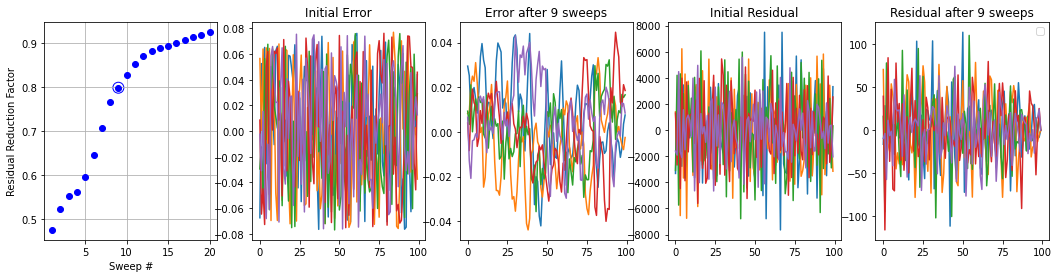

In [69]:
method_info = hm.solve.smoothing.check_relax_cycle_shrinkage(
    multilevel, num_levels=1, leeway_factor=1.3, slow_conv_factor=0.95, num_examples=5)
num_sweeps = method_info["relax"][1]

In [91]:
def smooothing(kh, discretization):
    a = hm.linalg.helmholtz_1d_discrete_operator(kh, discretization, n)
    level = hm.setup.hierarchy.create_finest_level(a)
    multilevel = hm.setup.hierarchy.multilevel.Multilevel.create(level)
    level.location = np.arange(n)

    shrinkage_factor, _, _, _, _, relax_conv_factor = hm.solve.smoothing.shrinkage_factor(
        level.operator, lambda x, b: level.relax(x, b), (a.shape[0],),
        max_sweeps=20, slow_conv_factor=1.1, leeway_factor=leeway_factor)
    return shrinkage_factor

In [94]:
kh_values = np.linspace(0, 3, 100)
s3 = np.array([smooothing(kh, "3-point") for kh in kh_values])
s5 = np.array([smooothing(kh, "5-point") for kh in kh_values])

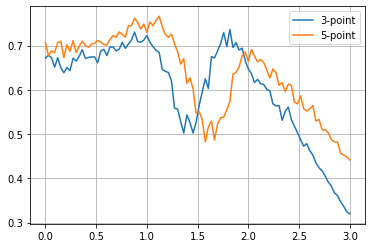

In [95]:
plt.plot(kh_values, s3, label="3-point");
plt.plot(kh_values, s5, label="5-point");
plt.grid(True)
plt.legend();

### Coarsening: Fixed (2/1)

In [48]:
# coarsening_info = pd.DataFrame(hm.analysis.stats.mock_cycle_rate(a, 2, 1), 
#                                columns=("Shrinkage", "#sweeps") + tuple(nu_values))

In [51]:
hm.analysis.stats.mock_cycle_rate(A, 2, 1)

[0.791720709623393,
 44,
 0.9057261665916592,
 0.9471048738976818,
 0.9379072728475475,
 0.9426552998691775,
 0.884372696043767,
 0.9081329561353775,
 0.9730437643687243,
 0.9625852045898351,
 0.9506302099667885,
 0.9647053874487139,
 0.9484838348725039]

nu  30 s [1.    0.161] Energy error [0.159 0.   ]
INFO     Mock cycle conv [0.898 0.82  0.836 0.747 0.708 0.702 0.646 0.601 0.565 0.515 0.495]


array([[-0.703, -0.711]])

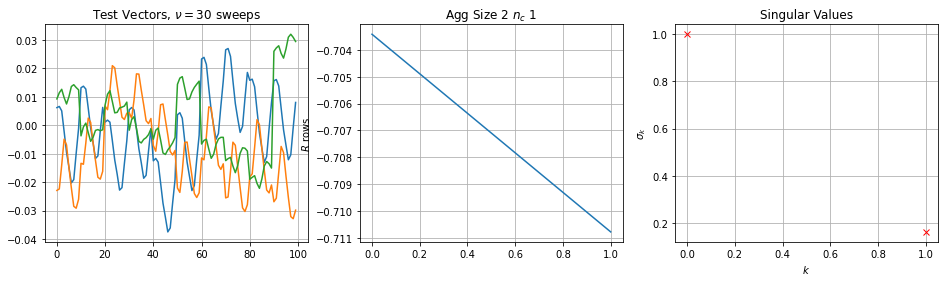

In [70]:
aggregate_size = 2
num_components = 1
helmholtz.analysis.plots.plot_svd_coarsening_accuracy(level, 30, aggregate_size, num_components)

In [52]:
# fig, axs = plt.subplots(1, 2, figsize=(12, 4))


# ax = axs[0]
# ax.set_ylim([0.5, 0.7])
# ax.plot(kh_values, coarsening_info_21[["Shrinkage"]])
# ax.set_title("Relaxation Shrinkage")
# ax.set_xlabel("$kh$")
# ax.grid()

# ax = axs[1]
# ax.plot(kh_values, coarsening_info_21[[5]], label="2/1")
# ax.plot(coarsening_info_42[[5]], label="4/2")
# ax.set_title("Mock Cycle Rates, $\\nu = 5$")
# ax.set_xlabel("$kh$")
# ax.grid()
# ax.legend();

In [ ]:
np.corrcoef(u1, u2)

array([[ 1.   , -0.093],
       [-0.093,  1.   ]])